In [41]:
import cv2
import matplotlib.pyplot as plt

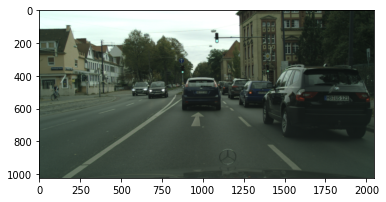

In [22]:
img = plt.imread('./bremen_000116_000019_leftImg8bit.png')
plt.imshow(img)

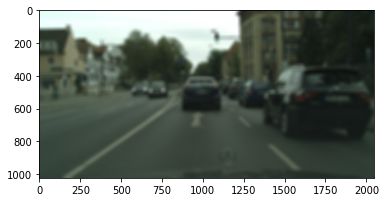

In [27]:
img_blur = cv2.GaussianBlur(img,(31,31),15,15)
plt.imshow(img_blur)
plt.imsave("test.png",img_blur)

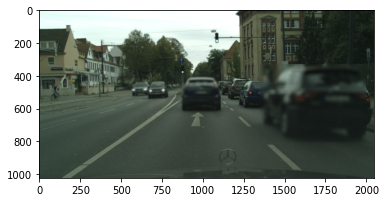

In [33]:
img = plt.imread('./bremen_000116_000019_leftImg8bit.png')

######
topLeft = (520, 410)
bottomRight = (780, 580)
x, y = topLeft[0], topLeft[1]
w, h = bottomRight[0] - topLeft[0], bottomRight[1] - topLeft[1]
ROI = img[y:y+h, x:x+w]
blur = cv2.GaussianBlur(ROI, (9,9), 15) 
img[y:y+h, x:x+w] = blur

######
topLeft = (850, 400)
bottomRight = (1100, 600)
x, y = topLeft[0], topLeft[1]
w, h = bottomRight[0] - topLeft[0], bottomRight[1] - topLeft[1]
ROI = img[y:y+h, x:x+w]
blur = cv2.GaussianBlur(ROI, (15,15), 15) 
img[y:y+h, x:x+w] = blur

######
topLeft = (1350, 330)
bottomRight = (2000, 800)
x, y = topLeft[0], topLeft[1]
w, h = bottomRight[0] - topLeft[0], bottomRight[1] - topLeft[1]
ROI = img[y:y+h, x:x+w]
blur = cv2.GaussianBlur(ROI, (31,31), 15) 
img[y:y+h, x:x+w] = blur

plt.imshow(img)
plt.imsave("test.png",img)

In [ ]:
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')

0.08652305603027344


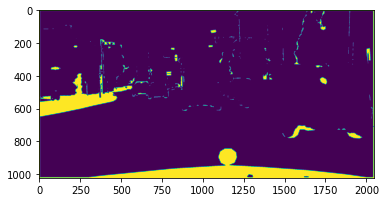

In [108]:
import numpy as np

testRes = plt.imread("./test_results/test.png")
gt = plt.imread("./ground_truth/gt116.png")
gt1 = plt.imread("./bremen_000116_000019_gtFine_labelIds.png")

gt = gt[:,:,0:3]

gt = cv2.cvtColor(gt,cv2.COLOR_RGB2GRAY)
testRes = cv2.cvtColor(testRes,cv2.COLOR_RGB2GRAY)

mask = (testRes - gt) >= 0.1
summ = np.sum(mask)

s = np.zeros((1024,2048),np.uint8)
s[mask] = 255
plt.imshow(s)
print(summ / 1024 / 2048)

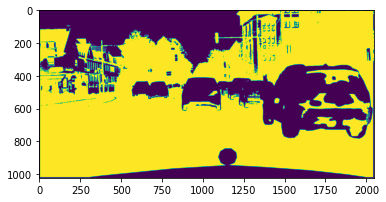

In [83]:
gt = gt[:,:,0:3]
err = 0

mask = img - gt <= 0.1
summ = np.sum(mask)

print(summ / 1024 / 2048 / 3)

0.6953279177347819


In [118]:
import cv2
import os

root = "./datasets/data/cityscapes/leftImg8bit/train"
for dirname in os.listdir(root):
    path = os.path.join(root,dirname)
    for filename in os.listdir(path):
        file = os.path.join(path,filename)
        img = plt.imread(file)
        img = cv2.GaussianBlur(img,(31,31),15,15)
        plt.imsave(file,img)